## Date: 31/01/2023

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
print("numpy version: ", np.__version__)
print("sklearn version: ", sklearn.__version__)
print("matplotlib version: ", matplotlib.__version__)


# numpy version:  1.24.1
# sklearn version:  1.2.0
# matplotlib version:  3.6.3

numpy version:  1.24.1
sklearn version:  1.2.0
matplotlib version:  3.6.3


In [3]:
plt.style.use(style="ggplot")

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=15)

In [5]:
X.shape

(100, 2)

In [6]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

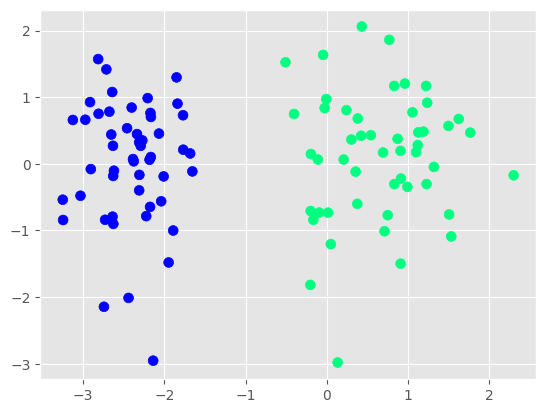

In [7]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=50, cmap="winter")
plt.show()

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Doc: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Doc: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

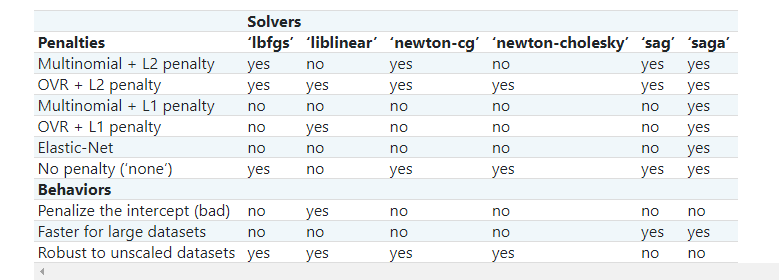

In [8]:
# we apply penalty=None so that any regularization not apply

# lr_model = LogisticRegression(penalty=None, solver="sag", max_iter=200)

lr_model = LogisticRegression()

In [9]:
lr_model.fit(X=X, y=y)

LogisticRegression()

In [10]:
lr_model.coef_

array([[2.87119932, 0.03099621]])

In [11]:
lr_model.intercept_

array([2.83641872])

In [12]:
m1 = -(lr_model.coef_[0][0] / lr_model.coef_[0][1])

b1 = -(lr_model.intercept_ / lr_model.coef_[0][1])

In [13]:
print(m1)
print(b1)

-92.63065199408942
[-91.50855984]


In [14]:
x_input1 = np.linspace(start=-3, stop=3, num=100)

y_input1 = m1 * x_input1 + b1

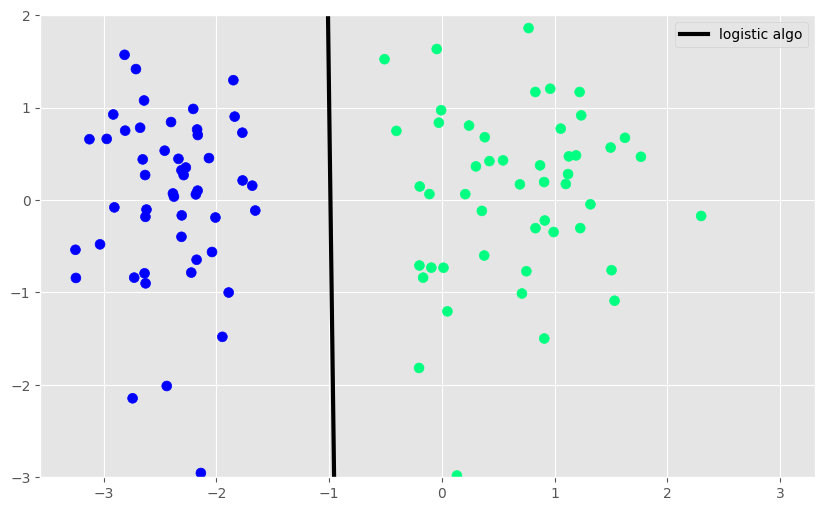

In [15]:
# Let's plot our line

plt.figure(figsize=(10,6))
plt.plot(x_input1, y_input1, color='black', linewidth=3, label="logistic algo")
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)
plt.legend()
plt.show()

### Let's create our model using gradient descent

In [16]:
class GradientDescentLR:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        # let's create our input matrix
        X = np.insert(arr=X, obj=0, values=1, axis=1)
        # Let's initilize the random weights
        self.coef_ = np.ones(X.shape[1])
        
        # Now iterating for every row and update the weights by using matrix dor operation
        # Here, basically we are using vanila gradient descent
        for i in range(self.epochs):
            y_pred = self.__sigmoid(np.dot(a=X, b=self.coef_))
            # Update the weights
            self.coef_ = self.coef_ + (self.lr * (np.dot(a=(y - y_pred), b=X) / X.shape[0]))
        
        self.intercept_, self.coef_ = self.coef_[0], self.coef_[1:]
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [17]:
my_model = GradientDescentLR(learning_rate=0.1, epochs=10000)

my_model.fit(X, y)

In [18]:
my_model.coef_

array([5.70211772, 0.25503576])

In [19]:
my_model.intercept_

5.37478549339637

In [20]:
m2 = -(my_model.coef_[0] / my_model.coef_[1])
b2 = -(my_model.intercept_ / my_model.coef_[1])

In [21]:
print(m2)
print(b2)

-22.358110471882956
-21.074634659259473


In [22]:
x_input2 = np.linspace(start=-3, stop=3, num=100)

y_input2 = m2 * x_input2 + b2

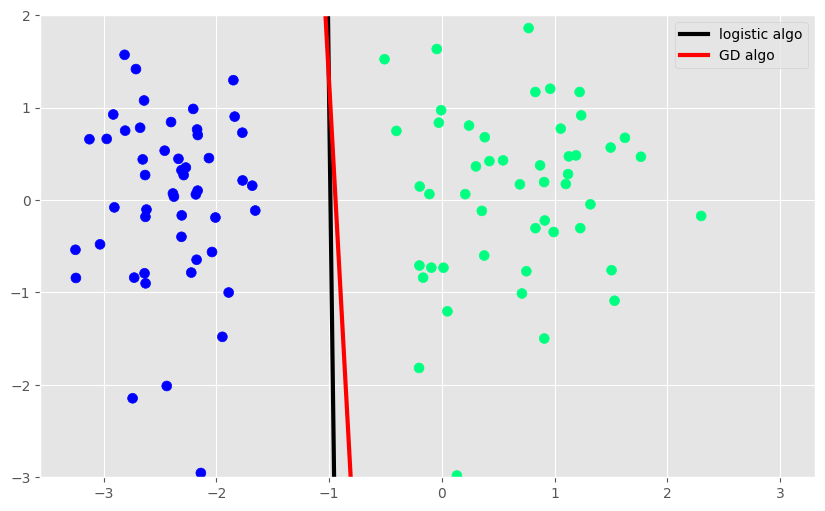

In [23]:
# Let's plot our line

plt.figure(figsize=(10,6))
plt.plot(x_input1, y_input1, color='black', linewidth=3, label="logistic algo")
plt.plot(x_input2, y_input2, color='red', linewidth=3, label="GD algo")
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)
plt.legend()
plt.show()